In [230]:
## НОРМАЛЬНЫЙ ВАРИАНТ

import numpy as np
import matplotlib.pyplot as plt
import imageio

turns = 100
yks = 256
xes = 256
jivih_kletok = (yks*xes)//3

# вариант создания поля, с рандомом и заданием кол-ва живых клеточек
field = np.zeros((yks, xes))
ys = np.random.randint(low=0, high=yks, size=jivih_kletok)
xs = np.random.randint(low=0, high=xes, size=jivih_kletok)
field[ys, xs] = 1

#задаём новое поле для следующего хода
new_field = np.zeros((yks, xes))

#начинается блок, в котором выбирается поле, подсчитывается кол-во соседей для центра этого поля, и просчитывается
#что будет с центром в следующем ходе (умрёт/оживёт). 
#в саму функцию подаётся старое поле, координаты просчитываемой точки и поле для следующего хода(чтобы обновить его)
def update_cell (field, i, j, new_field):
    
    #выбираем ячейку для просчёта
    target_cell = field [i, j]  
    
    #кусок, который сложно просчитывает соседей для пограничных состояний.
    #сначала условия для углов:
    #верхний левый
    if i == 0 and j == 0:
        skolko_sosedey = field[0, 1] + field[1, 1] + field[1, 0]
    #верхний правый
    elif i == 0 and  j == (xes-1):
        skolko_sosedey = field[0, -2] + field[1, -2] + field[1, -1]
    #нижний правый
    elif i == (yks-1) and j == (xes-1):
        skolko_sosedey = field[-1, -2] + field[-2, -2] + field[-2, -1]
    #нижний левый
    elif i == (yks-1) and j == 0:
        skolko_sosedey = field[-1, 1] + field[-2, 1] + field[-2, 0]
    #теперь условия для сторон:
    #верхняя кромка
    elif i == 0 and j > 0 and j < (xes-1):
        skolko_sosedey = field[0, j-1 ] + field[0, j+1 ] + field[1, j-1 ] + field[1, j ] + field[1, j+1 ]
    #правая кромка
    elif i > 0 and i < (yks-1) and j == (xes-1):
        skolko_sosedey = field[i-1, xes-1 ] + field[i-1, xes-2 ] + field[i, xes-2  ] + field[ i+1, xes-2 ] + field[ i+1, xes-1 ]
    #нижняя кромка
    elif i == (yks-1) and j > 0 and j < (xes-1):
        skolko_sosedey = field[ -1 , j-1 ] + field[ -2 , j-1 ] + field[ -2 , j ] + field[ -2, j+1 ] + field[ -1 , j+1 ]
    #левая кромка
    elif i > 0 and i < (yks-1) and j == 0:
        skolko_sosedey = field[ i-1, 0 ] + field[ i-1, 1 ] + field[ i, 1 ] + field[ i+1, 1 ] + field[ i+1, 0 ]
    #конец кода для просчёта граничных состояний. Теперь общий случай:
    else:
        sosedi_of_target_cell = field [i-1:i+2, j-1:j+2]
        skolko_sosedey = sosedi_of_target_cell.sum() - target_cell
    #конец кода для просчёта количества соседей в пограничных состояниях. 
    
    #Дальше логика с условиями выживает клетка или нет.
    if target_cell == 1:  #если target_cell живая, то 
        if skolko_sosedey < 2 or skolko_sosedey > 3:   #Если у неё соседей меньше 2 или больше 3, то она дохнет
            new_cell = 0
        else:    #Если у неё соседей 2 или 3, то живая клетка остаётся живой.
            new_cell = 1

    else:    #если target_cell мёртвая, то
        if skolko_sosedey == 3:    #если соседей ровно 3, то оживает
            new_cell = 1
        else:   #если у мёртвой клетки соседей меньше трёх или больше трёх, то она остаётся мёртвой.
            new_cell = 0

    new_field [i, j] = new_cell    #Записываем вычесленный статус новой клетки в заранее подготовленный эррей для следующего хода.


    
#Делаем ходы. Это вариант с сохранением графики. В этой части есть большая подчасть!
with imageio.get_writer('cell_automata_FUUUUU.mp4', mode='I') as writer:
    for turn in range(turns):
        writer.append_data(field)
        
        #начинается блок, который будет протаскивать функцию update_cell по всем ячейкам игрового поля field
        for i in range(yks):
            for j in range(xes):
                update_cell(field, i, j, new_field)

        #на один шаг обновляем изначальное поле и зануляем буферное поле
        field = new_field
        new_field = np.zeros((yks, xes))


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем длину и ширину поля
length = 5
width = 5

# Создаём рандомное поле
field = np.random.randint(0, 2, size=(width, length))

# # Либо создаём поле с нами же расставленными единичками
# field = np.zeros((length, width))

# rows = [0, 1, 2, 3, 4]
# cols = [0, 2, 2, 3, 4]

# field[rows, cols] = 1

#задаём новое поле для следующего хода
new_field = np.zeros((length, width))

#начинается блок, в котором выбирается поле, подсчитывается кол-во соседей для центра этого поля, и просчитывается
#что будет с центром в следующем ходе (умрёт/оживёт). 
#в саму функцию подаётся старое поле, координаты точки и поле для следующего хода(чтобы обновить его)
def update_cell (field, i, j, new_field):

    mid_cell = field [i, j]
    sosedi_of_mid_cell = field [i-1:j+2, i-1:j+2]

    skolko_sosedey = sosedi_of_mid_cell.sum() - mid_cell

    if mid_cell == 1:  #если mid_cell живая, то 
        if skolko_sosedey < 2 or skolko_sosedey > 3:   #Если у неё соседей меньше 2 или больше 3, то она дохнет
            new_cell = 0
        else:    #Если у неё соседей 2 или 3, то живая клетка остаётся живой.
            new_cell = 1

    else:    #если mid_cell мёртвая, то
        if skolko_sosedey == 3:    #если соседей ровно 3, то оживает
            new_cell = 1
        else:   #если у мёртвой клетки соседей меньше трёх или больше трёх, то она остаётся мёртвой.
            new_cell = 0

    new_field [i, j] = new_cell    #Записываем вычесленный статус новой клетки в заранее подготовленный эррей для следующего хода.


    
#Делаем ходы. В этой части есть важная подчасть!
for turn in range(0, 3):
    
    #начинается блок, который будет протаскивать функцию update_cell по всем ячейкам игрового поля field
    for i in range(length):
        for j in range(width):
            update_cell(field, i, j, new_field)

    #на один шаг обновляем изначальное поле и зануляем буферное поле
    field = new_field
    new_field = np.zeros((length, width))
    
    plt.imshow(field)
    plt.show()

In [228]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

turns = 100
yks = 256
xes = 256
jivih_kletok = (yks*xes)//3


# # Создаём рандомное поле
# field = np.random.randint(0, 2, size=(yks, xes))

# # Либо создаём поле с нами же расставленными единичками
# field = np.zeros((length, width))

# rows = [0, 1, 2, 3, 4]
# cols = [0, 2, 2, 3, 4]

# field[rows, cols] = 1

#3й вариант создания поля, с рандомом и заданием кол-ва живых клеточек
field = np.zeros((yks, xes))
ys = np.random.randint(low=0, high=yks, size=jivih_kletok)
xs = np.random.randint(low=0, high=xes, size=jivih_kletok)
field[ys, xs] = 1

#задаём новое поле для следующего хода
new_field = np.zeros((yks, xes))

#начинается блок, в котором выбирается поле, подсчитывается кол-во соседей для центра этого поля, и просчитывается
#что будет с центром в следующем ходе (умрёт/оживёт). 
#в саму функцию подаётся старое поле, координаты просчитываемой точки и поле для следующего хода(чтобы обновить его)
def update_cell (field, i, j, new_field):
    
    #выбираем ячейку для просчёта
    target_cell = field [i, j]  
    
    #кусок, который сложно просчитывает соседей для пограничных состояний.
    #сначала условия для углов:
    #верхний левый
    if i == 0 and j == 0:
        skolko_sosedey = field[0, 1] + field[1, 1] + field[1, 0]
    #верхний правый
    elif i == 0 and  j == (xes-1):
        skolko_sosedey = field[0, -2] + field[1, -2] + field[1, -1]
    #нижний правый
    elif i == (yks-1) and j == (xes-1):
        skolko_sosedey = field[-1, -2] + field[-2, -2] + field[-2, -1]
    #нижний левый
    elif i == (yks-1) and j == 0:
        skolko_sosedey = field[-1, 1] + field[-2, 1] + field[-2, 0]
    #теперь условия для сторон:
    #верхняя кромка
    elif i == 0 and j > 0 and j < (xes-1):
        skolko_sosedey = field[0, j-1 ] + field[0, j+1 ] + field[1, j-1 ] + field[1, j ] + field[1, j+1 ]
    #правая кромка
    elif i > 0 and i < (yks-1) and j == (xes-1):
        skolko_sosedey = field[i-1, xes-1 ] + field[i-1, xes-2 ] + field[i, xes-2  ] + field[ i+1, xes-2 ] + field[ i+1, xes-1 ]
    #нижняя кромка
    elif i == (yks-1) and j > 0 and j < (xes-1):
        skolko_sosedey = field[ -1 , j-1 ] + field[ -2 , j-1 ] + field[ -2 , j ] + field[ -2, j+1 ] + field[ -1 , j+1 ]
    #левая кромка
    elif i > 0 and i < (yks-1) and j == 0:
        skolko_sosedey = field[ i-1, 0 ] + field[ i-1, 1 ] + field[ i, 1 ] + field[ i+1, 1 ] + field[ i+1, 0 ]
    #конец кода для просчёта граничных состояний. Теперь общий случай:
    else:
        sosedi_of_target_cell = field [i-1:i+2, j-1:j+2]
        skolko_sosedey = sosedi_of_target_cell.sum() - target_cell
    #конец кода для просчёта количества соседей в пограничных состояниях. 
    
    #Дальше логика с условиями выживает клетка или нет.
    if target_cell == 1:  #если target_cell живая, то 
        if skolko_sosedey < 2 or skolko_sosedey > 3:   #Если у неё соседей меньше 2 или больше 3, то она дохнет
            new_cell = 0
        else:    #Если у неё соседей 2 или 3, то живая клетка остаётся живой.
            new_cell = 1

    else:    #если target_cell мёртвая, то
        if skolko_sosedey == 3:    #если соседей ровно 3, то оживает
            new_cell = 1
        else:   #если у мёртвой клетки соседей меньше трёх или больше трёх, то она остаётся мёртвой.
            new_cell = 0

    new_field [i, j] = new_cell    #Записываем вычесленный статус новой клетки в заранее подготовленный эррей для следующего хода.


    
#Делаем ходы. Это вариант с сохранением графики. В этой части есть большая подчасть!
with imageio.get_writer('cell_automata_FUUUUU.mp4', mode='I') as writer:
    for turn in range(turns):
        writer.append_data(field)
        
        #начинается блок, который будет протаскивать функцию update_cell по всем ячейкам игрового поля field
        for i in range(yks):
            for j in range(xes):
                update_cell(field, i, j, new_field)

        #на один шаг обновляем изначальное поле и зануляем буферное поле
        field = new_field
        new_field = np.zeros((yks, xes))

# #  Делаем ходы. Это вариант с сотрисовкой картинок. В этой части есть большая подчасть!      
# for turn in range(0, 3):
    
#     #блок с двумя циклами, который будет протаскивать функцию update_cell по всем ячейкам игрового поля field
#     for i in range(yks):
#         for j in range(xes):
#             update_cell(field, i, j, new_field)

#     #на один шаг обновляем изначальное поле и зануляем буферное поле
#     print('это изначальное поле')
#     plt.imshow(field)
#     plt.show()
    
#     print('это поле в которое записывались новые данные (уже после update_cell)')
#     plt.imshow(new_field)
#     plt.show()
    
#     field = new_field
#     new_field = np.zeros((yks, xes))
    
#     print ('а это свежеотрисованное поле, которое заменило собой изначальное')
#     plt.imshow(field)
#     plt.show()
    
#     print('дальше новый шаг\n\n\n')

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

In [117]:
test_field = np.zeros((5, 5))
print(test_field)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [123]:
test_field[0, 2]= 1

print(test_field)
print(test_field[0, 2])

[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1.]]
1.0


In [93]:
yks = 5
xes = 10

# Создаём рандомное поле
field = np.random.randint(0, 2, size=(yks, xes))
field

array([[1, 0, 0, 1, 0, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 1, 1, 1, 0, 1]])

In [142]:
yyy = 8
xxx = 10
kolvo = (yyy*xxx)//3

field = np.zeros((yyy, xxx))
print (field)
xxs = np.random.randint(low=0, high=xxx, size=kolvo)
print (xs)
yys = np.random.randint(low=0, high=yyy, size=kolvo)
print (ys)
field[ys, xs] = 1



[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[6 4 3 0 0 9 0 2 0 2 2 9 9 8 2 3 6 8 2 6 4 8 6 2 7 1]
[7 5 0 5 0 0 5 4 0 3 7 5 7 0 2 2 7 5 7 5 7 1 5 3 3 7]


[[1. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]]


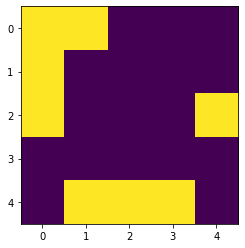

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


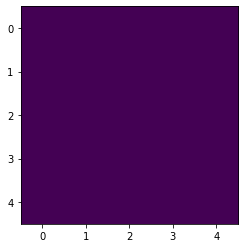

In [225]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

turns = 3
yks = 5
xes = 5
jivih_kletok = (yks*xes)//3


#3й вариант создания поля, с рандомом и заданием кол-ва живых клеточек
field = np.zeros((yks, xes))
xs = np.random.randint(low=0, high=xes, size=jivih_kletok)
ys = np.random.randint(low=0, high=yks, size=jivih_kletok)
field[ys, xs] = 1

#задаём новое поле для следующего хода
new_field = np.zeros((yks, xes))

print(field)
plt.imshow(field)
plt.show()
print(new_field)
plt.imshow(new_field)
plt.show()


вот такого размера поле после np.zeros


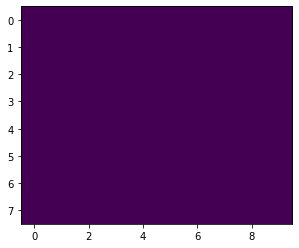

это координаты yys и xxs
<class 'numpy.ndarray'>
[7 5 0 5 0 0 5 4 0 3 7 5 0 2 2 7 5 7 5 7 1 5 3 3 7 0 6 6 7]
[6 4 3 0 0 9 0 2 0 2 2 9 8 2 3 6 8 2 6 4 8 6 2 7 1 1 8 9 8]


это поле после имплементации символа "1" по координатам


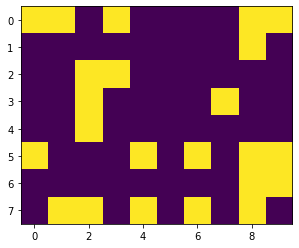

это else!
[[0. 0. 1.]
 [0. 0. 0.]
 [1. 0. 1.]]
3.0


Это поле new_field после просчёта ОДНОЙ клетки по координатам i и j


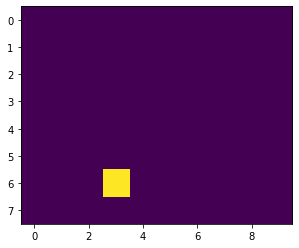

In [226]:
## кусок кода, чтобы тестировать корректность задания граничных условий



yks = 8
xes = 10
kolvo = (yks*xes)//3

field = np.zeros((yks, xes))
print ('вот такого размера поле после np.zeros')
plt.imshow(field)
plt.show()
print ('это координаты yys и xxs')
yys = np.array([7, 5, 0, 5, 0, 0, 5, 4, 0, 3, 7, 5, 0, 2, 2, 7, 5, 7, 5, 7, 1, 5, 3, 3, 7, 0, 6, 6, 7])
print(type(yys))
print (yys)
xxs = np.array([6, 4, 3, 0, 0, 9, 0, 2, 0, 2, 2, 9, 8, 2, 3, 6, 8, 2, 6, 4, 8, 6, 2, 7, 1, 1, 8, 9, 8])
print (xxs)

field[yys, xxs] = 1
print ('\n\nэто поле после имплементации символа "1" по координатам')
plt.imshow(field)
plt.show()

new_field = np.zeros((yks, xes))




i = 6
j = 3

target_cell = field [i, j]  
    
#кусок, который сложно просчитывает соседей для пограничных состояний.
#сначала условия для углов:
#верхний левый
if i == 0 and j == 0:
    skolko_sosedey = field[0, 1] + field[1, 1] + field[1, 0]
#верхний правый
elif i == 0 and  j == (xes-1):
    skolko_sosedey = field[0, -2] + field[1, -2] + field[1, -1]
#нижний правый
elif i == (yks-1) and j == (xes-1):
    skolko_sosedey = field[-1, -2] + field[-2, -2] + field[-2, -1]
#нижний левый
elif i == (yks-1) and j == 0:
    skolko_sosedey = field[-1, 1] + field[-2, 1] + field[-2, 0]
#теперь условия для сторон:
#верхняя кромка
elif i == 0 and j > 0 and j < (xes-1):
    skolko_sosedey = field[0, j-1 ] + field[0, j+1 ] + field[1, j-1 ] + field[1, j ] + field[1, j+1 ]
#правая кромка
elif i > 0 and i < (yks-1) and j == (xes-1):
    skolko_sosedey = field[i-1, xes-1 ] + field[i-1, xes-2 ] + field[i, xes-2  ] + field[ i+1, xes-2 ] + field[ i+1, xes-1 ]
#нижняя кромка
elif i == (yks-1) and j > 0 and j < (xes-1):
    skolko_sosedey = field[ -1 , j-1 ] + field[ -2 , j-1 ] + field[ -2 , j ] + field[ -2, j+1 ] + field[ -1 , j+1 ]
#левая кромка
elif i > 0 and i < (yks-1) and j == 0:
    skolko_sosedey = field[ i-1, 0 ] + field[ i-1, 1 ] + field[ i, 1 ] + field[ i+1, 1 ] + field[ i+1, 0 ]
#конец кода для просчёта граничных состояний. Теперь общий случай:
else:
    print('это else!')
    sosedi_of_target_cell = field [i-1:i+2, j-1:j+2]
    print (field [i-1:i+2, j-1:j+2])
    skolko_sosedey = sosedi_of_target_cell.sum() - target_cell
    print(skolko_sosedey)
#конец кода для просчёта количества соседей в пограничных состояниях. 

#Дальше логика с условиями выживает клетка или нет.
if target_cell == 1:  #если target_cell живая, то 
    if skolko_sosedey < 2 or skolko_sosedey > 3:   #Если у неё соседей меньше 2 или больше 3, то она дохнет
        new_cell = 0
    else:    #Если у неё соседей 2 или 3, то живая клетка остаётся живой.
        new_cell = 1

else:    #если target_cell мёртвая, то
    if skolko_sosedey == 3:    #если соседей ровно 3, то оживает
        new_cell = 1
    else:   #если у мёртвой клетки соседей меньше трёх или больше трёх, то она остаётся мёртвой.
        new_cell = 0

new_field [i, j] = new_cell    #Записываем вычесленный статус новой клетки в заранее подготовленный эррей для следующего хода.

print('\n\nЭто поле new_field после просчёта ОДНОЙ клетки по координатам i и j')
plt.imshow(new_field)
plt.show()

In [238]:
## ВИРУС

import numpy as np
import matplotlib.pyplot as plt
import imageio

turns = 70
yks = 512
xes = 512
jivih_kletok = (yks*xes)//20

# вариант создания поля, с рандомом и заданием кол-ва живых клеточек
field = np.zeros((yks, xes))
ys = np.random.randint(low=0, high=yks, size=jivih_kletok)
xs = np.random.randint(low=0, high=xes, size=jivih_kletok)
field[ys, xs] = 1

#задаём новое поле для следующего хода
new_field = np.zeros((yks, xes))

#начинается блок, в котором выбирается поле, подсчитывается кол-во соседей для центра этого поля, и просчитывается
#что будет с центром в следующем ходе (умрёт/оживёт). 
#в саму функцию подаётся старое поле, координаты просчитываемой точки и поле для следующего хода(чтобы обновить его)
def update_cell (field, i, j, new_field):
    
    #выбираем ячейку для просчёта
    target_cell = field [i, j]  
    
    #кусок, который сложно просчитывает соседей для пограничных состояний.
    #сначала условия для углов:
    #верхний левый
    if i == 0 and j == 0:
        skolko_sosedey = field[0, 1] + field[1, 1] + field[1, 0]
    #верхний правый
    elif i == 0 and  j == (xes-1):
        skolko_sosedey = field[0, -2] + field[1, -2] + field[1, -1]
    #нижний правый
    elif i == (yks-1) and j == (xes-1):
        skolko_sosedey = field[-1, -2] + field[-2, -2] + field[-2, -1]
    #нижний левый
    elif i == (yks-1) and j == 0:
        skolko_sosedey = field[-1, 1] + field[-2, 1] + field[-2, 0]
    #теперь условия для сторон:
    #верхняя кромка
    elif i == 0 and j > 0 and j < (xes-1):
        skolko_sosedey = field[0, j-1 ] + field[0, j+1 ] + field[1, j-1 ] + field[1, j ] + field[1, j+1 ]
    #правая кромка
    elif i > 0 and i < (yks-1) and j == (xes-1):
        skolko_sosedey = field[i-1, xes-1 ] + field[i-1, xes-2 ] + field[i, xes-2  ] + field[ i+1, xes-2 ] + field[ i+1, xes-1 ]
    #нижняя кромка
    elif i == (yks-1) and j > 0 and j < (xes-1):
        skolko_sosedey = field[ -1 , j-1 ] + field[ -2 , j-1 ] + field[ -2 , j ] + field[ -2, j+1 ] + field[ -1 , j+1 ]
    #левая кромка
    elif i > 0 and i < (yks-1) and j == 0:
        skolko_sosedey = field[ i-1, 0 ] + field[ i-1, 1 ] + field[ i, 1 ] + field[ i+1, 1 ] + field[ i+1, 0 ]
    #конец кода для просчёта граничных состояний. Теперь общий случай:
    else:
        sosedi_of_target_cell = field [i-1:i+2, j-1:j+2]
        skolko_sosedey = sosedi_of_target_cell.sum() - target_cell
    #конец кода для просчёта количества соседей в пограничных состояниях. 
    
    #Дальше логика с условиями выживает клетка или нет.
    if target_cell == 1:  #если target_cell живая, то 
        if skolko_sosedey == 8:   #Если у неё соседей 8, то она дохнет
            new_cell = 0
        else:    #Если у неё меньше 8, то живая клетка остаётся живой.
            new_cell = 1

    else:    #если target_cell мёртвая, то
        if skolko_sosedey > 2:    #если соседей больше 2, то оживает
            new_cell = 1
        else:   #если у мёртвой клетки соседей меньше 2 или 2, то она остаётся мёртвой.
            new_cell = 0

    new_field [i, j] = new_cell    #Записываем вычесленный статус новой клетки в заранее подготовленный эррей для следующего хода.


    
#Делаем ходы. Это вариант с сохранением графики. В этой части есть большая подчасть!
with imageio.get_writer('cell_automata_VIRUS.mp4', mode='I') as writer:
    for turn in range(turns):
        writer.append_data(field)
        
        #начинается блок, который будет протаскивать функцию update_cell по всем ячейкам игрового поля field
        for i in range(yks):
            for j in range(xes):
                update_cell(field, i, j, new_field)

        #на один шаг обновляем изначальное поле и зануляем буферное поле
        field = new_field
        new_field = np.zeros((yks, xes))

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
